In [1]:
from geneformer import EmbExtractor

/home/syyang/python_virtuenv/geneformer_3.11/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
Finetune_classifier_output_PATH =  "/home/syyang/GitRepo/_former/geneformer_results/adipose/finetune_classifier_output"

Model_PATH = f'{Finetune_classifier_output_PATH}/240512_geneformer_cellClassifier_classifier_finetune_output/ksplit1/checkpoint-4273'

Input_Data_PATH = "/home/syyang/GitRepo/_former/geneformer_results/adipose/output_prefix.dataset/"

# output dir is:
f"{Finetune_classifier_output_PATH}/trained_results"

'/home/syyang/GitRepo/_former/geneformer_results/adipose/finetune_classifier_output/trained_results'

In [3]:
# initiate EmbExtractor
embex = EmbExtractor(model_type="CellClassifier",
                     num_classes=26,
                     max_ncells=500,
                     emb_layer=0,
                     emb_label=["cell_type"],
                     labels_to_plot=["cell_type"],
                     forward_batch_size=50,
                     nproc=16)

# extracts embedding from input data
# input data is tokenized rank value encodings generated by Geneformer tokenizer (see tokenizing_scRNAseq_data.ipynb)
# example dataset: https://huggingface.co/datasets/ctheodoris/Genecorpus-30M/tree/main/example_input_files/cell_classification/disease_classification/human_dcm_hcm_nf.dataset
embs = embex.extract_embs(Model_PATH,
                          Input_Data_PATH,
                          f"{Finetune_classifier_output_PATH}/trained_results",
                          "extracted_embs")  # results would be the name `extracted_embs` in the output directory

100%|██████████| 10/10 [00:01<00:00,  5.10it/s]


max_ncells_to_plot must be <= max_ncells. Changing max_ncells_to_plot to 500.


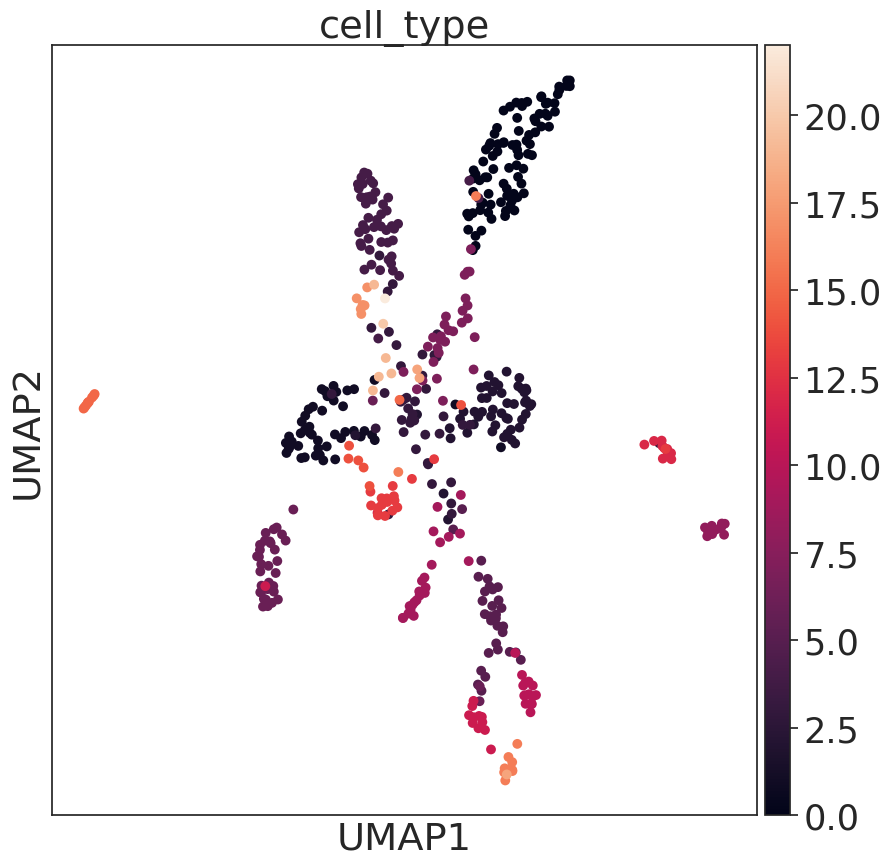

In [4]:
# plot UMAP of cell embeddings
# note: scanpy umap necessarily saves figs to figures directory
embex.plot_embs(embs=embs, 
                plot_style="umap",
                output_directory=f"{Finetune_classifier_output_PATH}/trained_results",  
                output_prefix="emb_plot")